In [140]:
# 1. C

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [142]:
df = pd.read_excel("synthetic_health_dataset.xlsx")

In [143]:
df.head()

,Gender,Smoking,Alcohol_Consumption,Exercise_Frequency,Blood_Pressure,Cholesterol_Level,Stress_Level,Age,BMI,Heart_Rate,Sleep_Hours,Blood_Sugar_Level,Medication_Use,Family_History,Illness
0,Female,No,Moderate,Never,Normal,Borderline,High,90.0,16.6,119.0,3.6,143.6,NaN,No,Yes
1,Other,Yes,NaN,Never,Normal,Normal,Low,20.0,29.9,69.0,9.9,121.8,NaN,Yes,No
2,Male,Yes,Heavy,Daily,High,High,Low,52.0,33.5,54.0,8.5,107.0,NaN,Yes,Yes
3,Male,Yes,Heavy,Daily,Normal,High,Low,15.0,20.3,72.0,9.5,92.1,NaN,No,Yes
4,Male,No,Moderate,Often,High,High,Medium,60.0,36.0,58.0,4.4,113.6,NaN,No,Yes


In [144]:
df.isna().sum()

Gender                  12
Smoking                  7
Alcohol_Consumption    351
Exercise_Frequency       7
Blood_Pressure          10
Cholesterol_Level        7
Stress_Level             5
Age                      8
BMI                      6
Heart_Rate               8
Sleep_Hours              6
Blood_Sugar_Level        3
Medication_Use         345
Family_History           5
Illness                  0
dtype: int64

In [145]:
y = df['Illness']
x = df.drop(['Illness'], axis=1)

In [146]:
from pandas.api.types import is_numeric_dtype

In [147]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    x[col] = x[col].fillna(x[col].mean())

In [148]:
x.isna().sum()

Gender                  12
Smoking                  7
Alcohol_Consumption    351
Exercise_Frequency       7
Blood_Pressure          10
Cholesterol_Level        7
Stress_Level             5
Age                      0
BMI                      0
Heart_Rate               0
Sleep_Hours              0
Blood_Sugar_Level        0
Medication_Use         345
Family_History           5
dtype: int64

In [149]:
mms = MinMaxScaler()

In [150]:
x = pd.get_dummies(x)

In [151]:
x.head()

,Age,BMI,Heart_Rate,Sleep_Hours,Blood_Sugar_Level,Gender_Female,Gender_Male,Gender_Other,Smoking_No,Smoking_Yes,...,Cholesterol_Level_Borderline,Cholesterol_Level_High,Cholesterol_Level_Normal,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Medication_Use_Occasional,Medication_Use_Regular,Family_History_No,Family_History_Yes
0,90.0,16.6,119.0,3.6,143.6,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,20.0,29.9,69.0,9.9,121.8,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,52.0,33.5,54.0,8.5,107.0,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,True
3,15.0,20.3,72.0,9.5,92.1,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
4,60.0,36.0,58.0,4.4,113.6,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [152]:
x = mms.fit_transform(x)

In [153]:
num_col = ["Age",	"BMI",	"Heart_Rate",	"Sleep_Hours",	"Blood_Sugar_Level"]

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [155]:
# mms = MinMaxScaler()

In [156]:
log_reg = LogisticRegression()

In [157]:
model = log_reg.fit(x_train, y_train)

In [158]:
model.score(x_train, y_train)

0.5875

In [159]:
model.score(x_test, y_test)

0.475

In [160]:
pred_y = model.predict(x_test)

In [161]:
accuracy_score(pred_y, y_test)

0.475

In [162]:
cm = confusion_matrix(y_test, pred_y)

<Axes: >

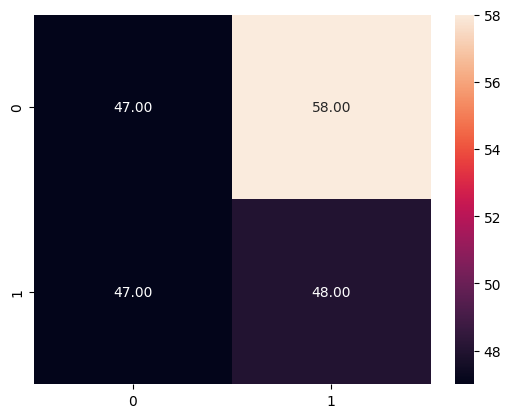

In [163]:
sns.heatmap(cm, annot = True, fmt = '.2f')

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
Knn = KNeighborsClassifier(n_neighbors=5) 

In [166]:
model2 = Knn.fit(x_train, y_train)

In [167]:
model2.score(x_train, y_train)

0.67375

In [168]:
model2.score(x_test, y_test)

0.485